# Naloga 3: Zobje

In [60]:
import pandas as pd
import math
import numpy
from random import seed, randint
import matplotlib.pyplot as plt
import statistics
import random
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import norm
from scipy import stats

In [61]:
Zobje = pd.read_csv("Zobje.csv")
Zobje

,dolzina,nacin,kolicina
0,4.2,VC,0.5
1,11.5,VC,0.5
2,7.3,VC,0.5
3,5.8,VC,0.5
4,6.4,VC,0.5
5,10.0,VC,0.5
6,11.2,VC,0.5
7,11.2,VC,0.5
8,5.2,VC,0.5
9,7.0,VC,0.5


(array([ 5.,  7.,  3.,  7.,  8.,  5.,  9., 11.,  3.,  2.]),
 array([ 4.2 ,  7.17, 10.14, 13.11, 16.08, 19.05, 22.02, 24.99, 27.96,
        30.93, 33.9 ]),
 <BarContainer object of 10 artists>)

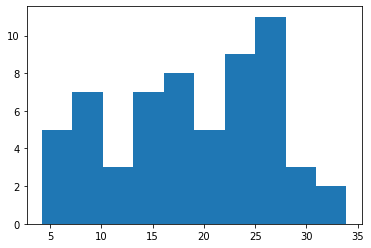

In [62]:
plt.hist(Zobje.dolzina)

### A naloga
Preizkusite, ali dodajanje vitamina C vpliva na rast zob.

Domneva H0: dodajanje vitamina C vpliva na rast zob (dodajanje vitamina C bo povečalo pričakovano vrednost velikosti zoba: mi0.5 < mi1.0 < mi2.0)

Domneva H1: dodajanje vitamina C ne vpliva na rast zob (mi0.5 > mi1.0 ali mi1.0 > mi2.0)

Pričakovano vrednost za posamezno količino ocenimo s povprečjem dolzin zob iz danega vzorca, kar je nepristranska cenilka.

In [63]:
#pričakovane vrednosti za neko količino
po_kolicni = Zobje.groupby('kolicina').mean()
po_kolicni

,dolzina
kolicina,
0.5,10.605
1.0,19.735
2.0,26.100


<AxesSubplot:xlabel='kolicina', ylabel='dolzina'>

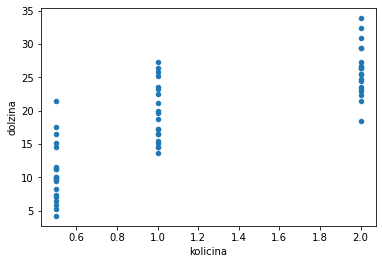

In [64]:
Zobje.plot.scatter(x='kolicina', y='dolzina')

Naredimo preizkus hipoteze:

H0: mi0.5 >= mi1.0

H1: mi0.5 < mi1.0

In [65]:
Zobje_pol = Zobje[Zobje.kolicina == 0.5]
Zobje_ena = Zobje[Zobje.kolicina == 1.0]
Zobje_dva = Zobje[Zobje.kolicina == 2.0]

In [66]:
stats.ttest_ind(a=Zobje_ena.dolzina, b=Zobje_pol.dolzina, alternative='greater')

Ttest_indResult(statistic=6.476647726589102, pvalue=6.331484806608257e-08)

Hipotezo H0 zavrnemo ker je vrednost p manjša od alpha(0.5).

### B naloga
**Kateri način dodajanja je učinkovitejši? Preizkusite, ali je razlika statistično značilna.**

Najprej poglejmo kakšna so povprečja dolžin po količini dodajanja.

In [67]:
Zobje_pomarančni = Zobje[Zobje.nacin == 'OJ']
Zobje_pomarančni.groupby('kolicina').mean()

,dolzina
kolicina,
0.5,13.23
1.0,22.70
2.0,26.06


In [68]:
Zobje_neposredno = Zobje[Zobje.nacin == 'VC']
Zobje_neposredno.groupby('kolicina').mean()

,dolzina
kolicina,
0.5,7.98
1.0,16.77
2.0,26.14


Iz povprečji ne moremo razbrati kateri način je učinkovitejši. Opravili bomo preizkus hipoteze s Studentovim t-testom.
Zapišimo ničelno in alternativno hipotezo.

H0: miPO < miNE  (pričakovana vrednost dodajanja s pomarančnim je manjša kot pričakovana za neposredno dodajanje)

H1: miPO >= miNE  (pričakovana vrednost dodajanja s pomarančnim je višja)

In [69]:
# poračunamo standardni odklon
std1 = Zobje_neposredno.dolzina.std()
std2 = Zobje_pomarančni.dolzina.std()

In [70]:
#preverimo ali sta si varianci dovolj podobni za t-test
std1**2/std2**2 < 3

True

In [71]:
#t-test za enostransko ocenjevanje('greater')
#vrne t statistiko in vrednost p
stats.ttest_ind(a=Zobje_pomarančni.dolzina, b=Zobje_neposredno.dolzina, alternative='greater')

Ttest_indResult(statistic=1.91526826869527, pvalue=0.03019668561206424)

In [72]:
#H0 zavrzemo, če je p vrednost manjša kot izbrani alfa

pvalue = 0.03019668561206424
alpha = 0.05

pvalue < alpha

True

Zavrnemo hipotezo H0